In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics import pairwise_distances
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wiki=pd.read_csv('people_wiki.csv')

In [3]:
wiki.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [9]:
map_index=pd.read_json('people_wiki_map_index_to_word.json', typ='series')

In [10]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)
    
corpus = load_sparse_csr('people_wiki_tf_idf.npz')

In [18]:
map_index[corpus[0].indices].index

Index(['pices', 'anies', 'alfonzo', '1987schmidt', 'pomar', 'asiawong',
       'contradict', 'schoolwieckowski', 'vishu', 'complexstructured',
       ...
       'millionbeard', 'asrama', 'anglique', '229326', 'gal', '4week',
       'moneybakalis', 'feirberg', 'sussexvisiting', 'papazov'],
      dtype='object', length=139)

In [127]:
corpus[0,corpus[0].nonzero()[1]].data[1]


0.002980575592194913

In [44]:
reverse_map=pd.Series(data=map_index.index.values,index=map_index)

In [179]:
def map_word(corpus,word_map):
    def count(row):
        dic={}
        for i in corpus[row].indices:
            dic[word_map[i]]=corpus[row,i]
        return dic
    word_table=list(map(count,range(corpus.shape[0])))
    return word_table

In [180]:
%%time
words_count_1=map_word(corpus,reverse_map)

Wall time: 6min 59s


In [99]:
wiki['weights']=words_count_1
wiki.head(5)


,URI,name,text,words_count_1,weights
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': [6, 193, 116, 236, 21, 249, ...","{'brisbaneafter': 10.986495389225194, 'edflhe'..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': [6, 193, 116, 236, 21, 249, ...","{'maladaptation': 10.986495389225194, 'phasede..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': [6, 193, 116, 236, 21, 249, 37...","{'germanyover': 10.986495389225194, 'bluesgosp..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'fantasticrottensteiner': [6, 193, 116, 236, ...","{'fantasticrottensteiner': 10.986495389225194,..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'arhm': [196, 144, 87, 113, 208, 122, 64, 64]...","{'arhm': 32.95948616767558, 'gangstergenka': 1..."


standard normal distribution: np.random.randn(x1,x2) return a (x1,x2) shape samples of normal distribution
For random samples from N(mu, sigma^2), use:

sigma * np.random.randn(...) + mu

In [101]:
def generate_random_vectors(num_vector, dim):
    return np.random.randn(dim, num_vector)
np.random.seed(0) # set seed=0 for consistent results
print (generate_random_vectors(num_vector=3, dim=5))

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]]


In [181]:
np.random.seed(0)
random_vectors = generate_random_vectors(num_vector=16, dim=547979)
print (random_vectors.shape)

(547979, 16)


In [183]:
doc = corpus[0, :] # vector of tf-idf values for document 0
print (doc.dot(random_vectors[:, 0]) >= 0 )

[ True]


In [185]:
print (doc.dot(random_vectors[:, 1]) >= 0)

[ True]


In [188]:
print (doc.dot(random_vectors) >= 0) # should return an array of 16 True/False bits
print (np.array(doc.dot(random_vectors) >= 0, dtype=int))# display index bits in 0/1's

[[ True  True False False False  True  True False  True  True  True False
  False  True False  True]]
[[1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1]]


In [192]:
print (np.array(corpus.dot(random_vectors) >= 0, dtype=int))

[[1 1 0 ... 1 0 1]
 [1 0 0 ... 0 0 1]
 [0 1 0 ... 1 0 1]
 ...
 [1 1 0 ... 1 1 1]
 [0 1 1 ... 1 0 1]
 [1 0 1 ... 0 0 1]]


In [196]:
np.arange(15, -1, -1)

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [197]:
doc = corpus[0, :]  # first document
index_bits = (doc.dot(random_vectors) >= 0)
powers_of_two = (1 << np.arange(15, -1, -1))
print (index_bits)
print (powers_of_two)           # [32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
print (index_bits.dot(powers_of_two))

[[ True  True False False False  True  True False  True  True  True False
  False  True False  True]]
[32768 16384  8192  4096  2048  1024   512   256   128    64    32    16
     8     4     2     1]
[50917]


In [203]:
index_bits = corpus.dot(random_vectors) >= 0
bin=index_bits.dot(powers_of_two)

In [216]:
def train_lsh(data, num_vector=16, seed=None):
    
    dim = data.shape[1]
    if seed is not None:
        np.random.seed(seed)
    random_vectors = generate_random_vectors(num_vector, dim)
  
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
  
    table = {}
    
    # Partition data points into bins
    bin_index_bits = (data.dot(random_vectors) >= 0)
  
    # Encode bin index bits into integers
    bin_indices = bin_index_bits.dot(powers_of_two)
    
    # Update `table` so that `table[i]` is the list of document ids with bin index equal to i.
    for data_index, bin_index in enumerate(bin_indices):
        if bin_index not in table:
            # If no list yet exists for this bin, assign the bin an empty list.
            table[bin_index] = [data_index]
        # Fetch the list of document ids associated with the bin and add the document id to the end.
        else:
            table[bin_index].append(data_index)# YOUR CODE HERE

    model = {'data': data,
             'bin_index_bits': bin_index_bits,
             'bin_indices': bin_indices,
             'table': table,
             'random_vectors': random_vectors,
             'num_vector': num_vector}
    
    return model

In [217]:
model = train_lsh(corpus, num_vector=16, seed=143)
table = model['table']
if   0 in table and table[0]   == [39583] and \
   143 in table and table[143] == [19693, 28277, 29776, 30399]:
    print ('Passed!')
else:
    print ('Check your code.')

Passed!


In [220]:
wiki[wiki['name'] == 'Barack Obama']

,URI,name,text,words_count_1,weights
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,"{'husen': [6, 193, 116, 236, 21, 249, 37, 64],...","{'husen': 10.986495389225194, '2012obama': 10...."


In [295]:
print(table[35817])
np.array(model['bin_index_bits'][35817],dtype=int)

[36447]


array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [225]:
wiki[wiki['name'] == 'Joe Biden']

,URI,name,text,words_count_1,weights
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,"{'badn': [6, 193, 116, 236, 21, 249, 37, 64], ...","{'badn': 10.986495389225194, 'rbnt': 10.986495..."


In [232]:
np.sum(np.array(model['bin_index_bits'][24478],dtype=int)==np.array(model['bin_index_bits'][35817],dtype=int))

14

In [248]:
print (model['table'][model['bin_indices'][35817]])
doc_ids=[21426, 39426, 50261, 53937]

[21426, 35817, 39426, 50261, 53937]


In [245]:
wiki.iloc[[21426, 35817, 39426, 50261, 53937]]

,URI,name,text,weights
21426,<http://dbpedia.org/resource/Mark_Boulware>,Mark Boulware,mark boulware born 1948 is an american diploma...,"{'tamandar': 10.986495389225194, 'navymark': 1..."
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,"{'husen': 10.986495389225194, '2012obama': 10...."
39426,<http://dbpedia.org/resource/John_Wells_(polit...,John Wells (politician),sir john julius wells born 30 march 1925 is a ...,"{'widdecombethroughout': 10.986495389225194, '..."
50261,<http://dbpedia.org/resource/Francis_Longstaff>,Francis Longstaff,francis a longstaff born august 3 1956 is an a...,"{'programlongstaff': 10.986495389225194, 'awar..."
53937,<http://dbpedia.org/resource/Madurai_T._Sriniv...,Madurai T. Srinivasan,maduraitsrinivasan is a wellknown figure in th...,"{'inusa': 10.986495389225194, 'arasu': 10.9864..."


In [260]:
def norm(x):
    sum_sq=x.dot(x.T)
    norm=np.sqrt(sum_sq)
    return(norm)

def cosine_distance(x, y):
    xy = x.dot(y.T)
    dist = xy/(norm(x)*norm(y))
    return 1-dist[0,0]

obama_tf_idf = corpus[35817,:]
biden_tf_idf = corpus[24478,:]

print ('================= Cosine distance from Barack Obama')
print ('Barack Obama - {0:24s}: {1:f}'.format('Joe Biden',cosine_distance(obama_tf_idf, biden_tf_idf)))
for i in doc_ids:
    print ('Barack Obama - {0:24s}: {1:f}'.format(wiki.iloc[i]['name'],cosine_distance(obama_tf_idf, corpus[i,:])))

================= Cosine distance from Barack Obama
Barack Obama - Joe Biden               : 0.703139
Barack Obama - Mark Boulware           : 0.950867
Barack Obama - John Wells (politician) : 0.975966
Barack Obama - Francis Longstaff       : 0.978256
Barack Obama - Madurai T. Srinivasan   : 0.993092


In [261]:
from itertools import combinations

In [314]:
num_vector=16
search_radius=2
for dif in combinations(range(num_vector),search_radius):
    print (dif)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(7, 14)
(7, 15)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(8, 13)
(8, 14)
(8, 15)
(9, 10)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
(9, 15)
(10, 11)
(10, 12)
(10, 13)
(10, 14)
(10, 15)
(11, 12)
(11, 13)
(11, 14)
(11, 15)
(12, 13)
(12, 14)
(12, 15)
(13, 14)
(13, 15)
(14, 15)


In [299]:
def search_nearby_bins(query_bin_bits, table, search_radius=2, initial_candidates=set()):
    """
    For a given query vector and trained LSH model, return all candidate neighbors for
    the query among all bins within the given search radius.
    
    Example usage
    -------------
    >>> model = train_lsh(corpus, num_vector=16, seed=143)
    >>> q = model['bin_index_bits'][0]  # vector for the first document
  
    >>> candidates = search_nearby_bins(q, model['table'])
    """
    num_vector = len(query_bin_bits)
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
    
    # Allow the user to provide an initial set of candidates.
    candidate_set = copy(initial_candidates)
    
    for different_bits in combinations(range(num_vector), search_radius):       
        # Flip the bits (n_1,n_2,...,n_r) of the query bin to produce a new bit vector.
        ## Hint: you can iterate over a tuple like a list
        alternate_bits = copy(query_bin_bits)
        for i in different_bits:
            alternate_bits[i] = not(alternate_bits[i]) # YOUR CODE HERE 
        
        # Convert the new bit vector to an integer index
        nearby_bin = alternate_bits.dot(powers_of_two)
        
        # Fetch the list of documents belonging to the bin indexed by the new bit vector.
        # Then add those documents to candidate_set
        # Make sure that the bin exists in the table!
        # Hint: update() method for sets lets you add an entire list to the set
        if nearby_bin in table:
            candidate_set.update(table[nearby_bin]) # YOUR CODE HERE: Update candidate_set with the documents in this bin.
            
    return candidate_set

In [402]:
obama_bin_index = model['bin_index_bits'][35817] 
print(obama_bin_index.dot(powers_of_two))# bin index of Barack Obama
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=0)
if candidate_set == set([35817, 21426, 53937, 39426, 50261]):
    print ('Passed test')
else:
    print ('Check your code')
print ('List of documents in the same bin as Obama: 35817, 21426, 53937, 39426, 50261')

50194
Passed test
List of documents in the same bin as Obama: 35817, 21426, 53937, 39426, 50261


In [356]:
model['bin_index_bits']

array([[ True,  True, False, ..., False,  True,  True],
       [False, False,  True, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       ...,
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ..., False,  True,  True],
       [False, False,  True, ...,  True, False, False]])

In [357]:
candidate_set = search_nearby_bins(obama_bin_index, model['table'], search_radius=1, initial_candidates=candidate_set)
if candidate_set == set([39426, 38155, 38412, 28444, 9757, 41631, 39207, 59050, 47773, 53937, 21426, 34547,
                         23229, 55615, 39877, 27404, 33996, 21715, 50261, 21975, 33243, 58723, 35817, 45676,
                         19699, 2804, 20347]):
    print ('Passed test')
else:
    print ('Check your code')

Passed test


In [378]:
def query(vec, model, k, max_search_radius):
  
    data = model['data']
    table = model['table']
    random_vectors = model['random_vectors']
    num_vector = random_vectors.shape[1]
    
    # Compute bin index for the query vector, in bit representation.
    bin_index_bits = (vec.dot(random_vectors) >= 0).flatten()
    
    # Search nearby bins and collect candidates
    candidate_set = set()
    for search_radius in range(max_search_radius+1):
        candidate_set = search_nearby_bins(bin_index_bits, table, search_radius, initial_candidates=candidate_set)
    
    # Sort candidates by their true distances from the query
    nearest_neighbors = pd.DataFrame({'id':list(candidate_set)})
    candidates = data[np.array(list(candidate_set)),:]
    nearest_neighbors['distance'] = pairwise_distances(candidates, vec, metric='cosine').flatten()
    
    return nearest_neighbors.sort_values('distance',ascending=True).head(k), len(candidate_set)

In [397]:
result,nums=query(corpus[35817,:], model, k=10, max_search_radius=3)
result['distance'].mean()

0.7835864427436547

In [393]:
print (result.set_index('id').join(wiki['name']).sort_values('distance'))

       distance                     name
id                                      
35817  0.000000             Barack Obama
24478  0.703139                Joe Biden
56008  0.856848            Nathan Cullen
37199  0.874669  Barry Sullivan (lawyer)
40353  0.890034            Neil MacBride
9267   0.898377      Vikramaditya Khanna
55909  0.899340              Herman Cain
9165   0.900921     Raymond F. Clevenger
57958  0.903003        Michael J. Malbin
49872  0.909533            Lowell Barron


In [395]:
wiki['id']=wiki.index
wiki=wiki.set_index('id')

In [399]:
import time
num_candidates_history = []
query_time_history = []
max_distance_from_query_history = []
min_distance_from_query_history = []
average_distance_from_query_history = []

for max_search_radius in range(17):
    start=time.time()
    # Perform LSH query using Barack Obama, with max_search_radius
    result, num_candidates = query(corpus[35817,:], model, k=10,
                                   max_search_radius=max_search_radius)
    end=time.time()
    query_time = end-start  # Measure time
    
    print ('Radius:', max_search_radius)
    # Display 10 nearest neighbors, along with document ID and name
    print (result.set_index('id').join(wiki['name']).sort_values('distance'))
    
    # Collect statistics on 10 nearest neighbors
    average_distance_from_query = result['distance'][1:].mean()
    max_distance_from_query = result['distance'][1:].max()
    min_distance_from_query = result['distance'][1:].min()
    
    num_candidates_history.append(num_candidates)
    query_time_history.append(query_time)
    average_distance_from_query_history.append(average_distance_from_query)
    max_distance_from_query_history.append(max_distance_from_query)
    min_distance_from_query_history.append(min_distance_from_query)

Radius: 0
       distance                     name
id                                      
35817  0.000000             Barack Obama
21426  0.950867            Mark Boulware
39426  0.975966  John Wells (politician)
50261  0.978256        Francis Longstaff
53937  0.993092    Madurai T. Srinivasan
Radius: 1
       distance                                   name
id                                                    
35817  0.000000                           Barack Obama
41631  0.947459                            Binayak Sen
21426  0.950867                          Mark Boulware
33243  0.951766                        Janice Lachance
33996  0.960859                            Rufus Black
28444  0.961081                       John Paul Phelan
20347  0.974130                        Gianni De Fraja
39426  0.975966                John Wells (politician)
34547  0.978215  Nathan Murphy (Australian politician)
50261  0.978256                      Francis Longstaff
Radius: 2
       distance        

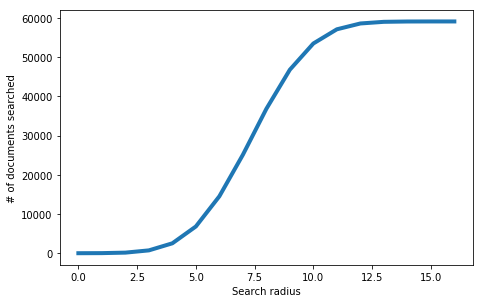

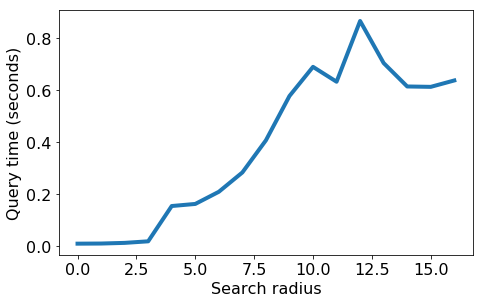

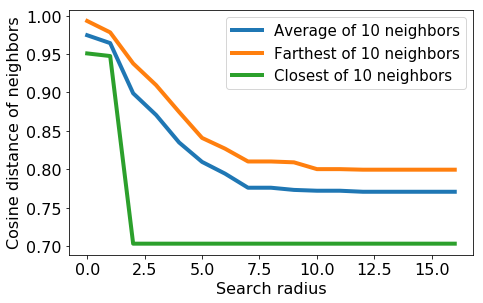

In [400]:
plt.figure(figsize=(7,4.5))
plt.plot(num_candidates_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('# of documents searched')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(query_time_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('Query time (seconds)')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(average_distance_from_query_history, linewidth=4, label='Average of 10 neighbors')
plt.plot(max_distance_from_query_history, linewidth=4, label='Farthest of 10 neighbors')
plt.plot(min_distance_from_query_history, linewidth=4, label='Closest of 10 neighbors')
plt.xlabel('Search radius')
plt.ylabel('Cosine distance of neighbors')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [401]:
average_distance_from_query_history

[0.9745452682750878,
 0.9642887060258674,
 0.898958384583039,
 0.8706516030485053,
 0.8349346493308571,
 0.8096145239653254,
 0.7943131453905069,
 0.7759826058523336,
 0.7759826058523336,
 0.7731349875446499,
 0.772070052411731,
 0.772070052411731,
 0.7707191289494767,
 0.7707191289494767,
 0.7707191289494767,
 0.7707191289494767,
 0.7707191289494767]